<a href="https://colab.research.google.com/github/ozturkgizem/Agriculture/blob/main/plt_sns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

In [ ]:
df = pd.read_csv("Crop_recommendation.csv")

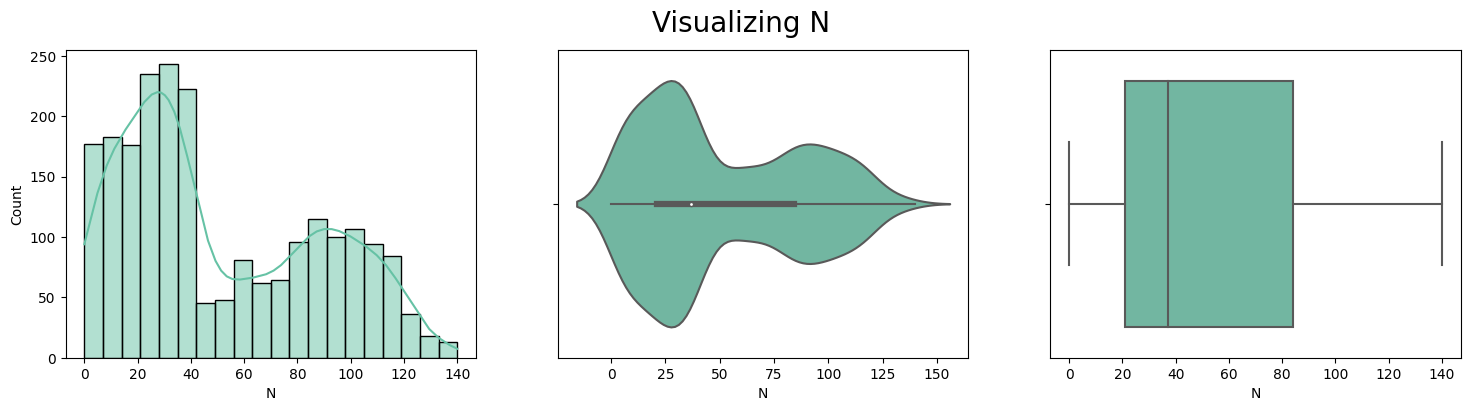

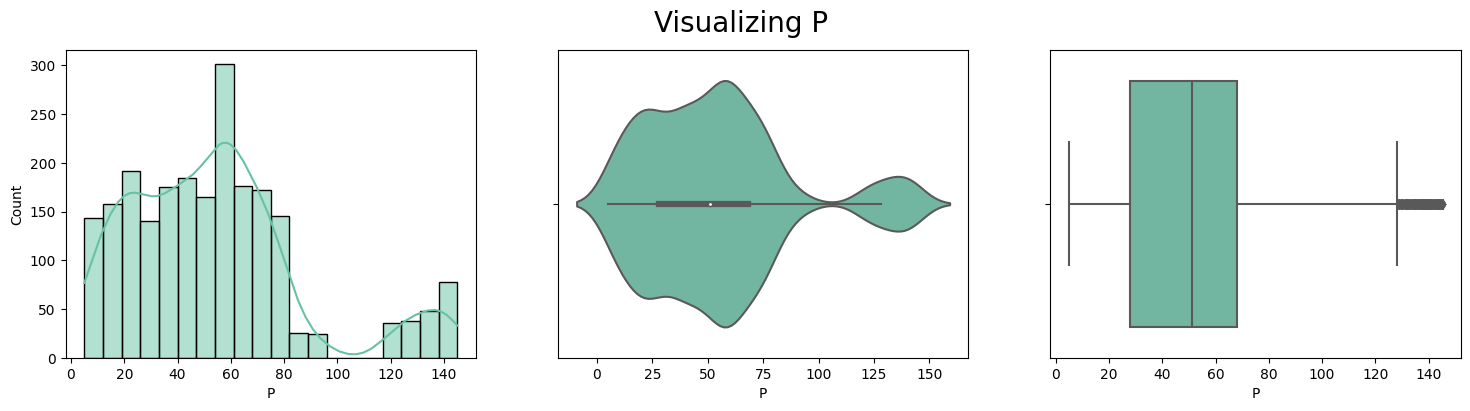

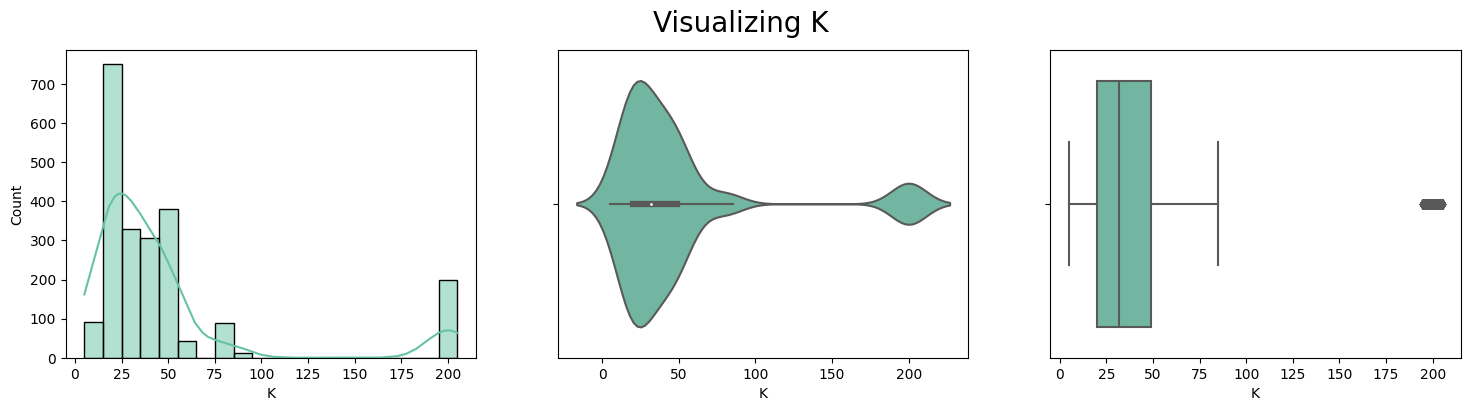

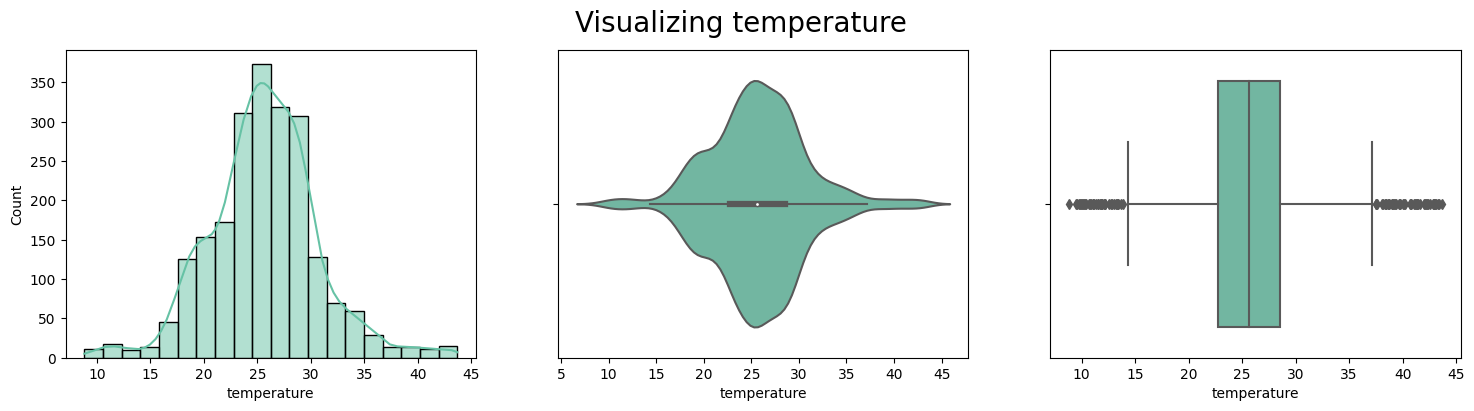

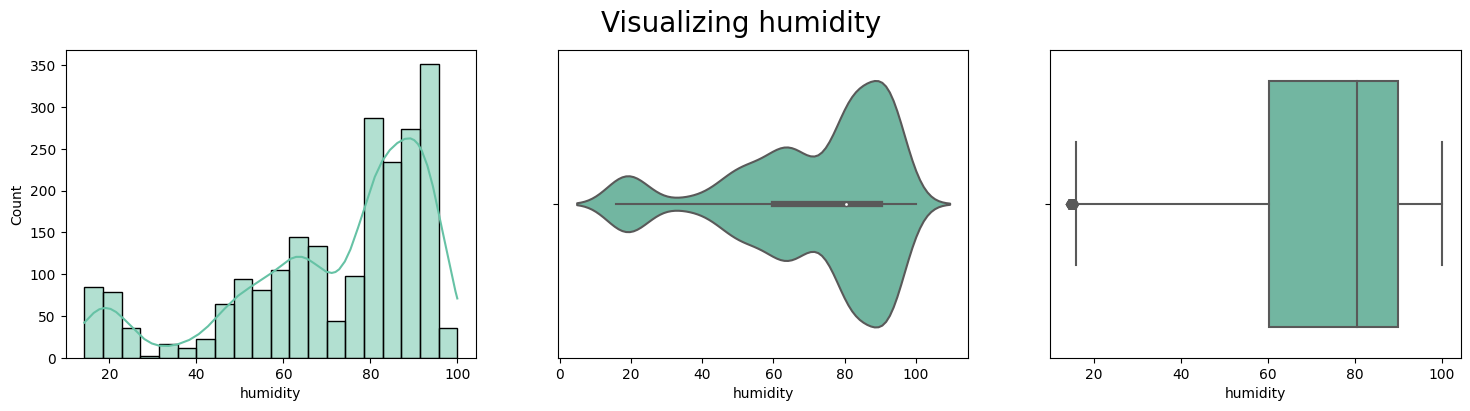

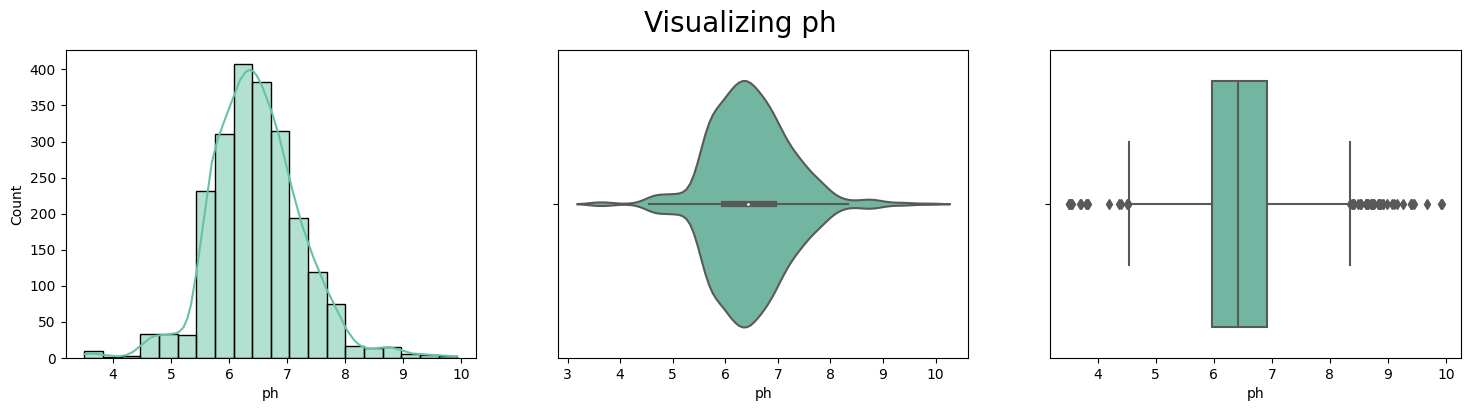

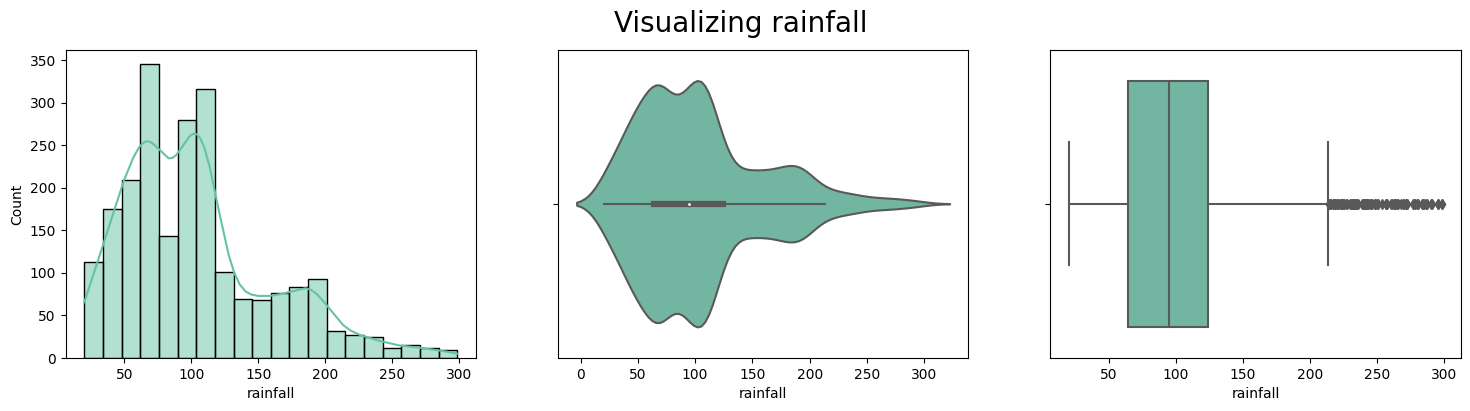

In [ ]:
plt.style.use('fast')
sns.set_palette("Set2")
for i in df.columns[:-1]:
    fig,ax=plt.subplots(1,3,figsize=(18,4))
    sns.histplot(data=df,x=i,kde=True,bins=20,ax=ax[0])
    sns.violinplot(data=df,x=i,ax=ax[1])
    sns.boxplot(data=df,x=i,ax=ax[2])
    plt.suptitle(f'Visualizing {i}',size=20)

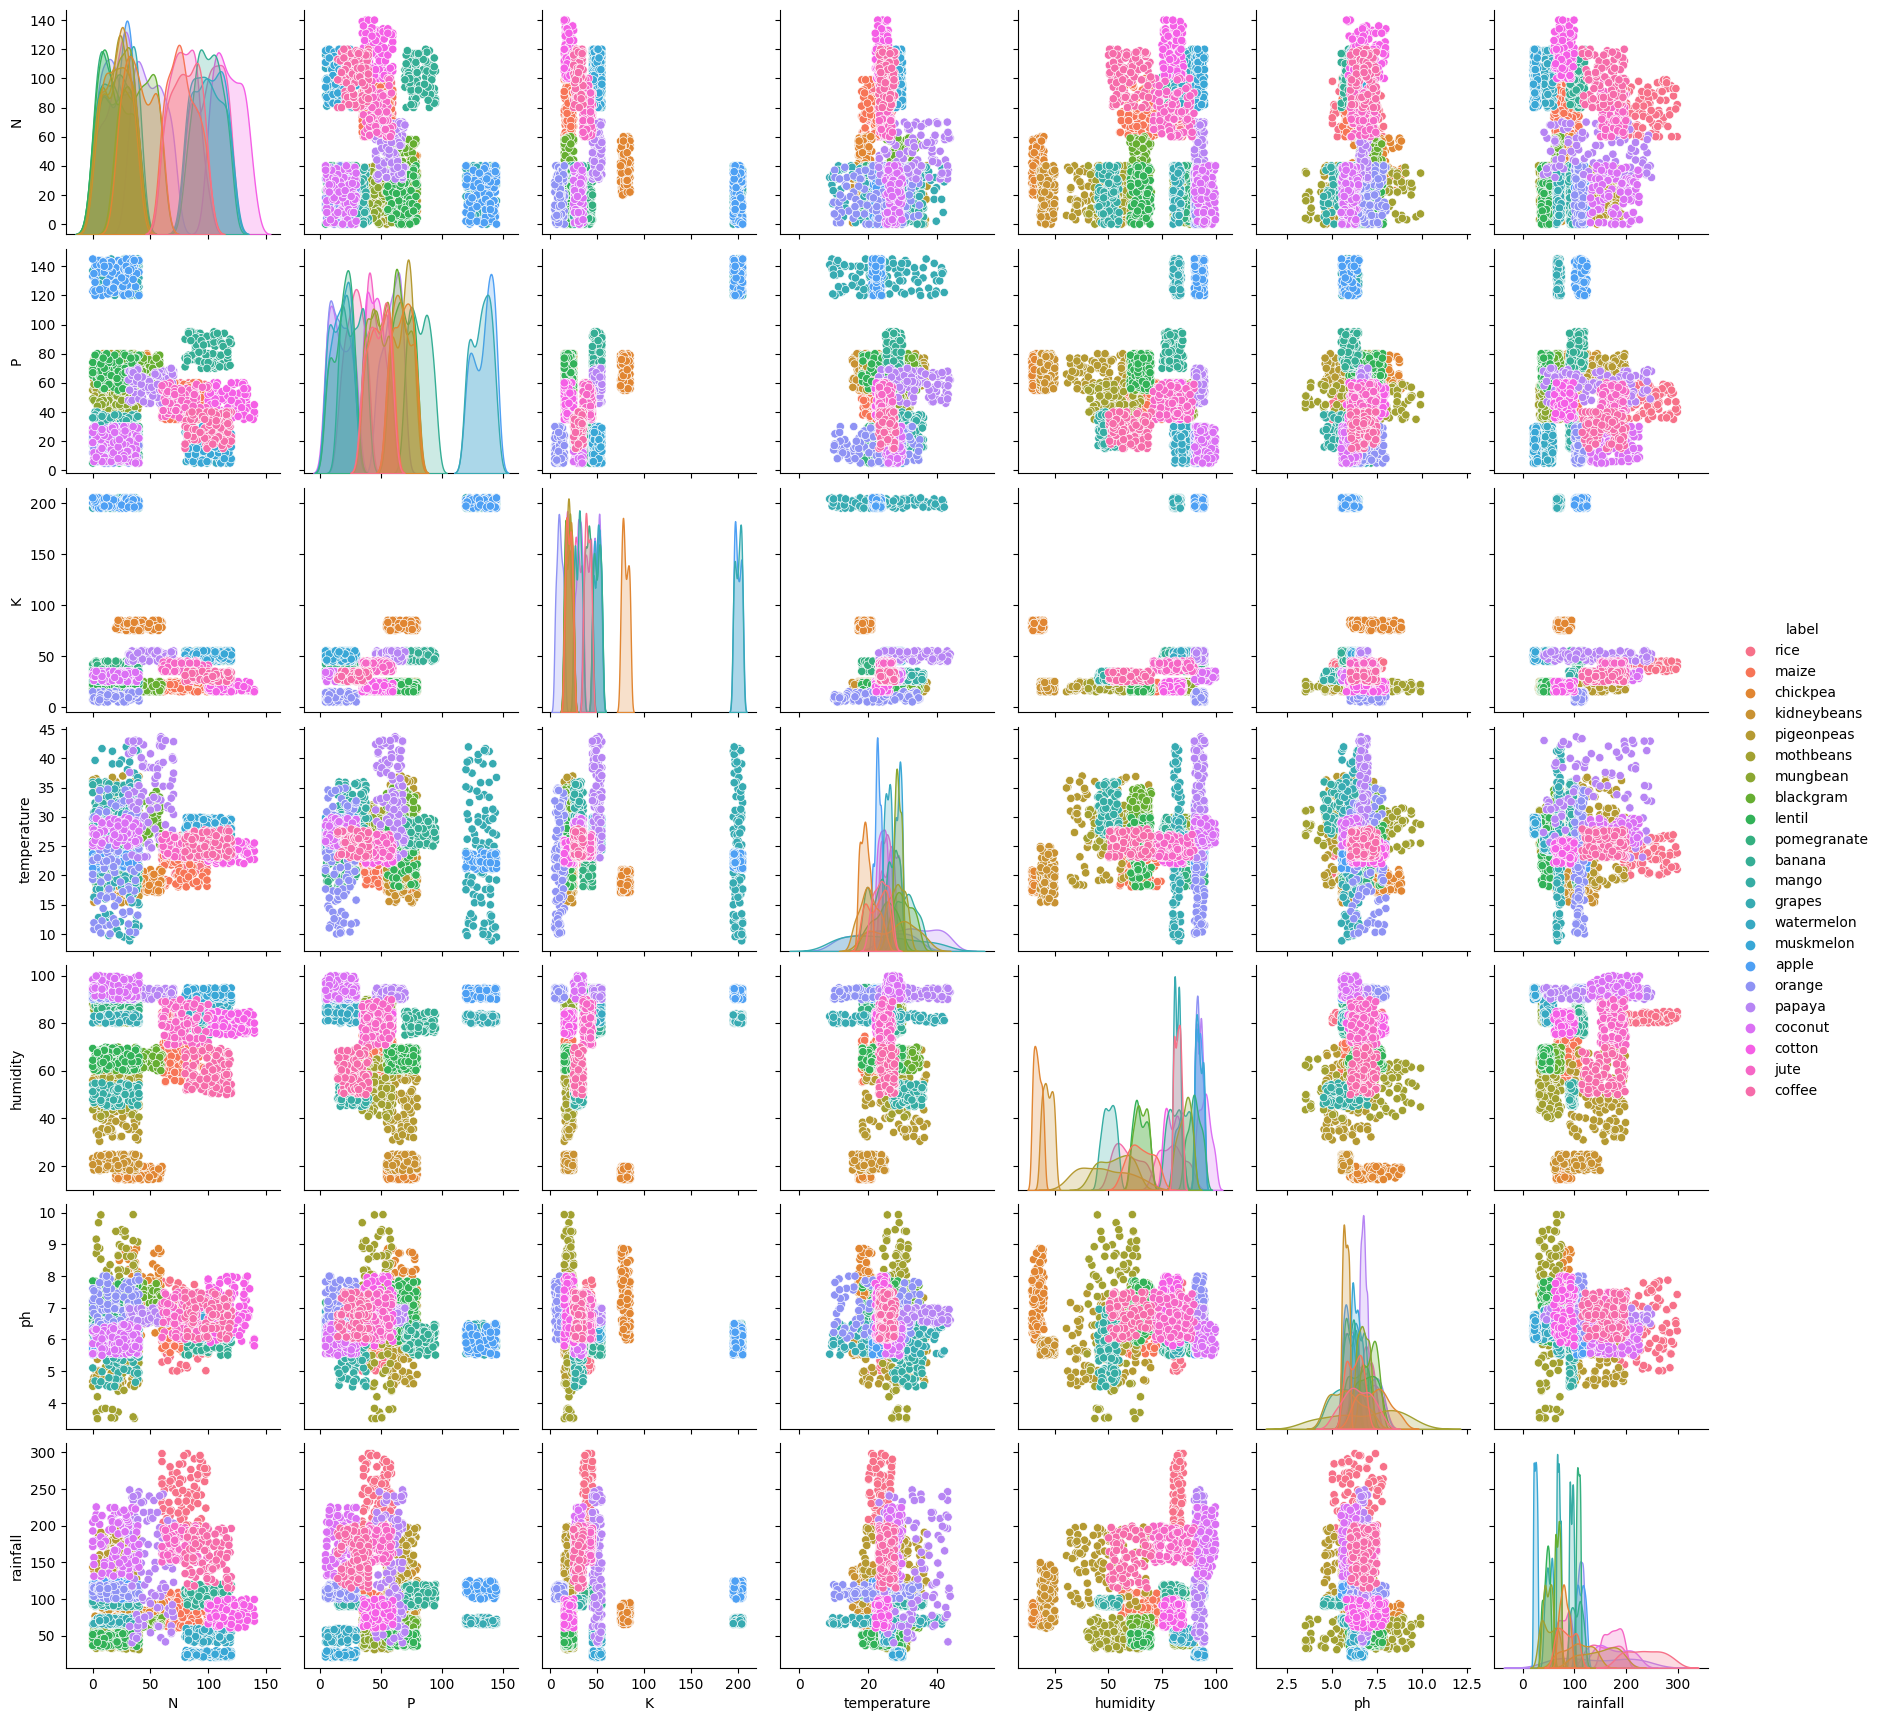

In [ ]:
sns.pairplot(df, hue ='label')

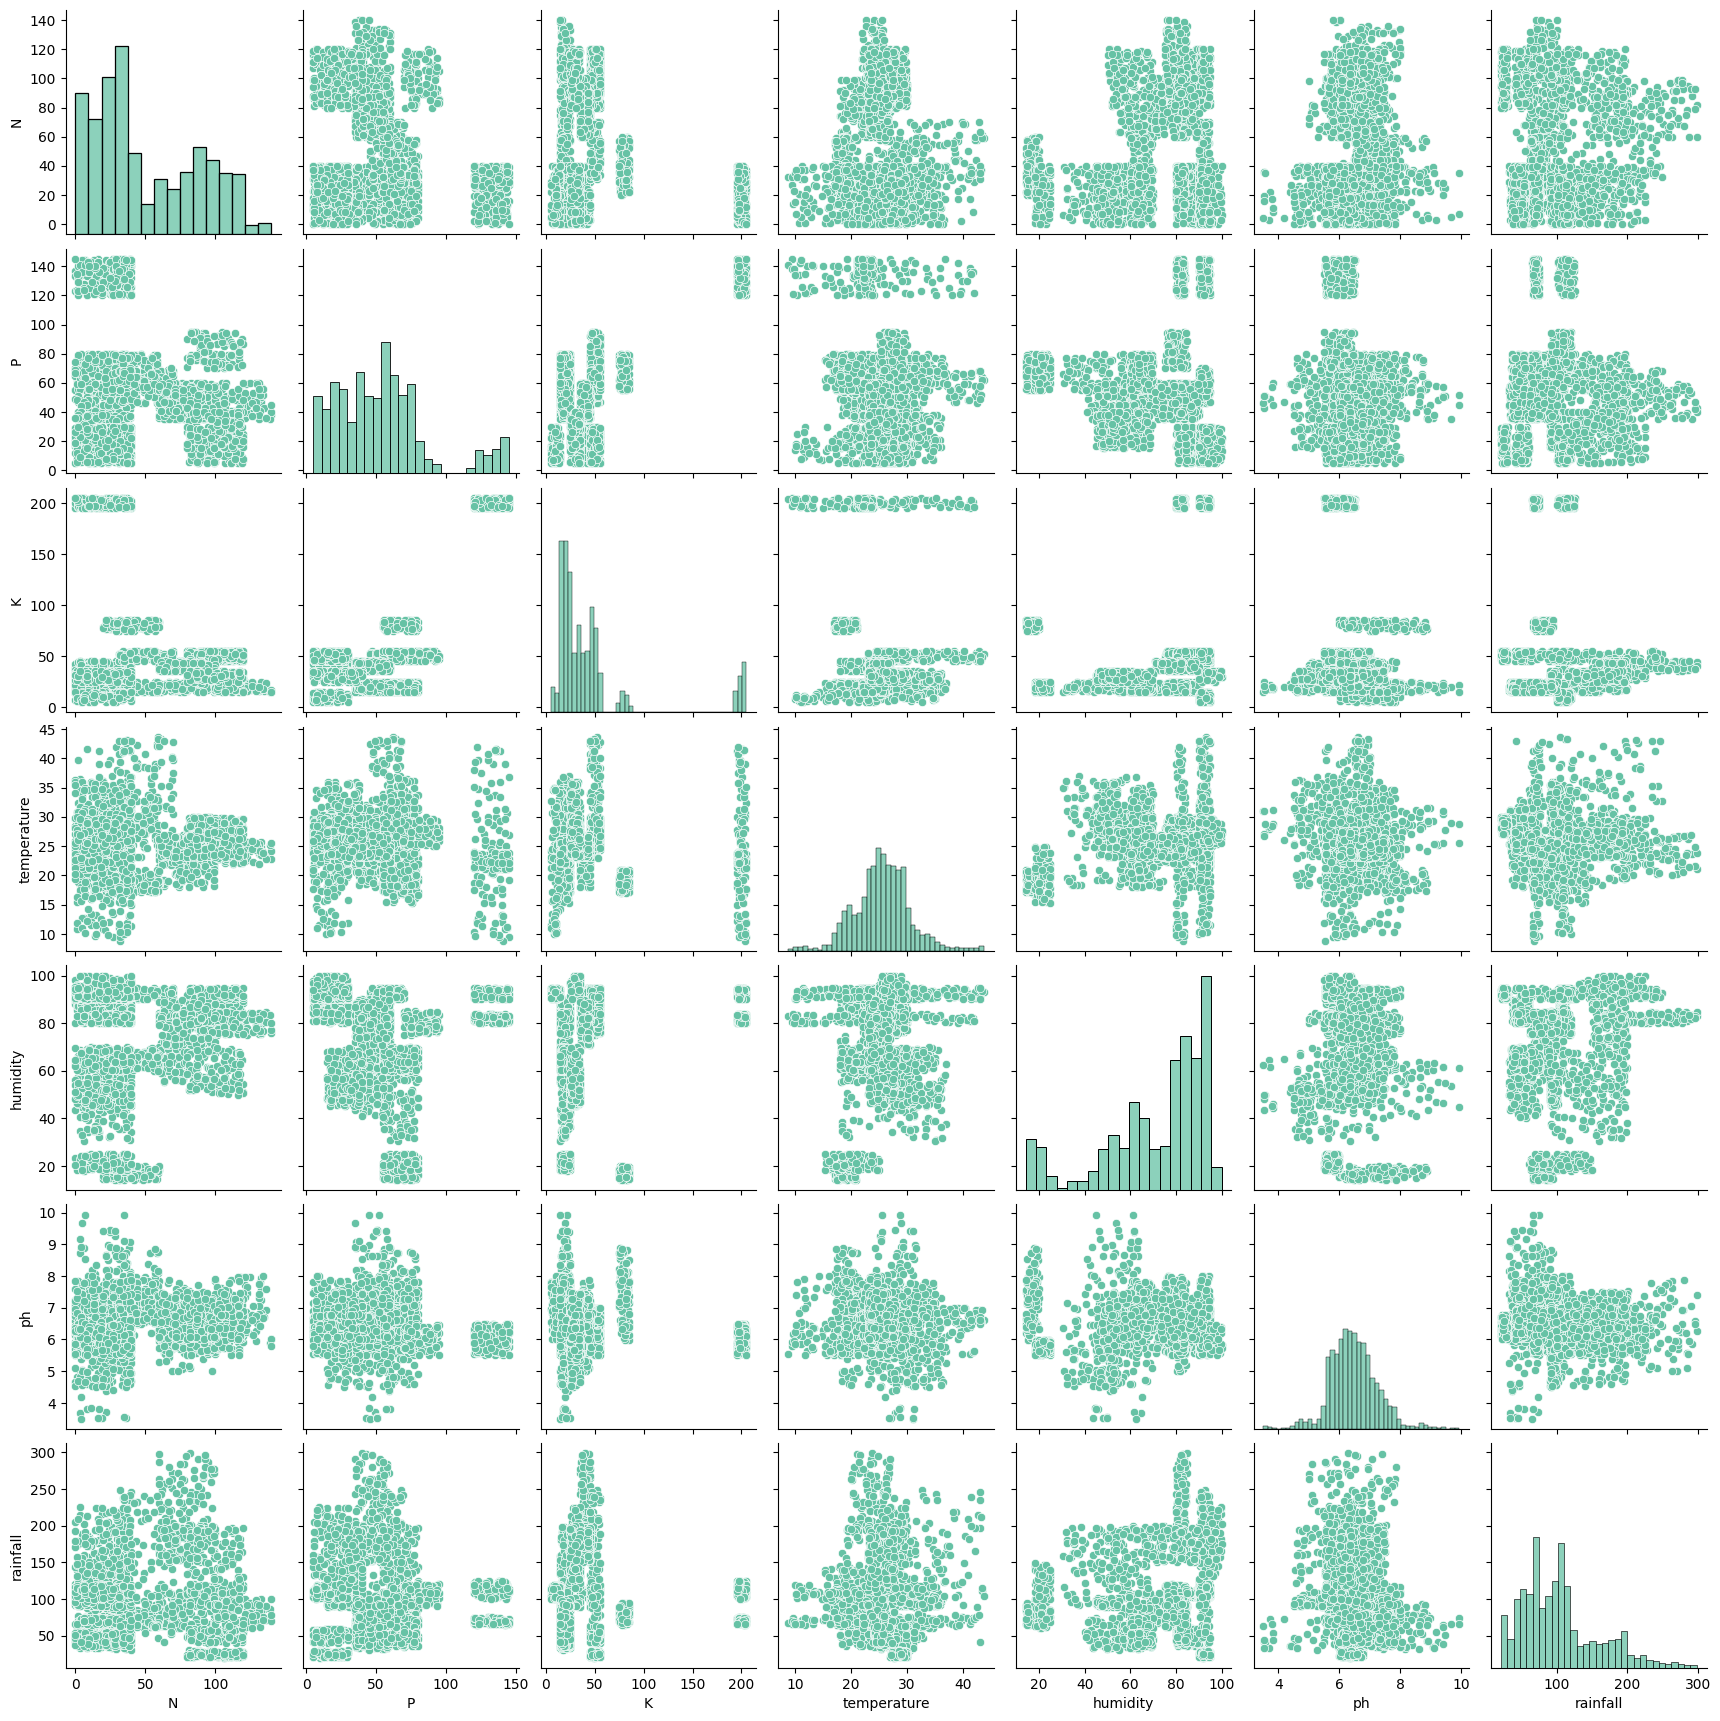

In [ ]:
sns.pairplot(df)

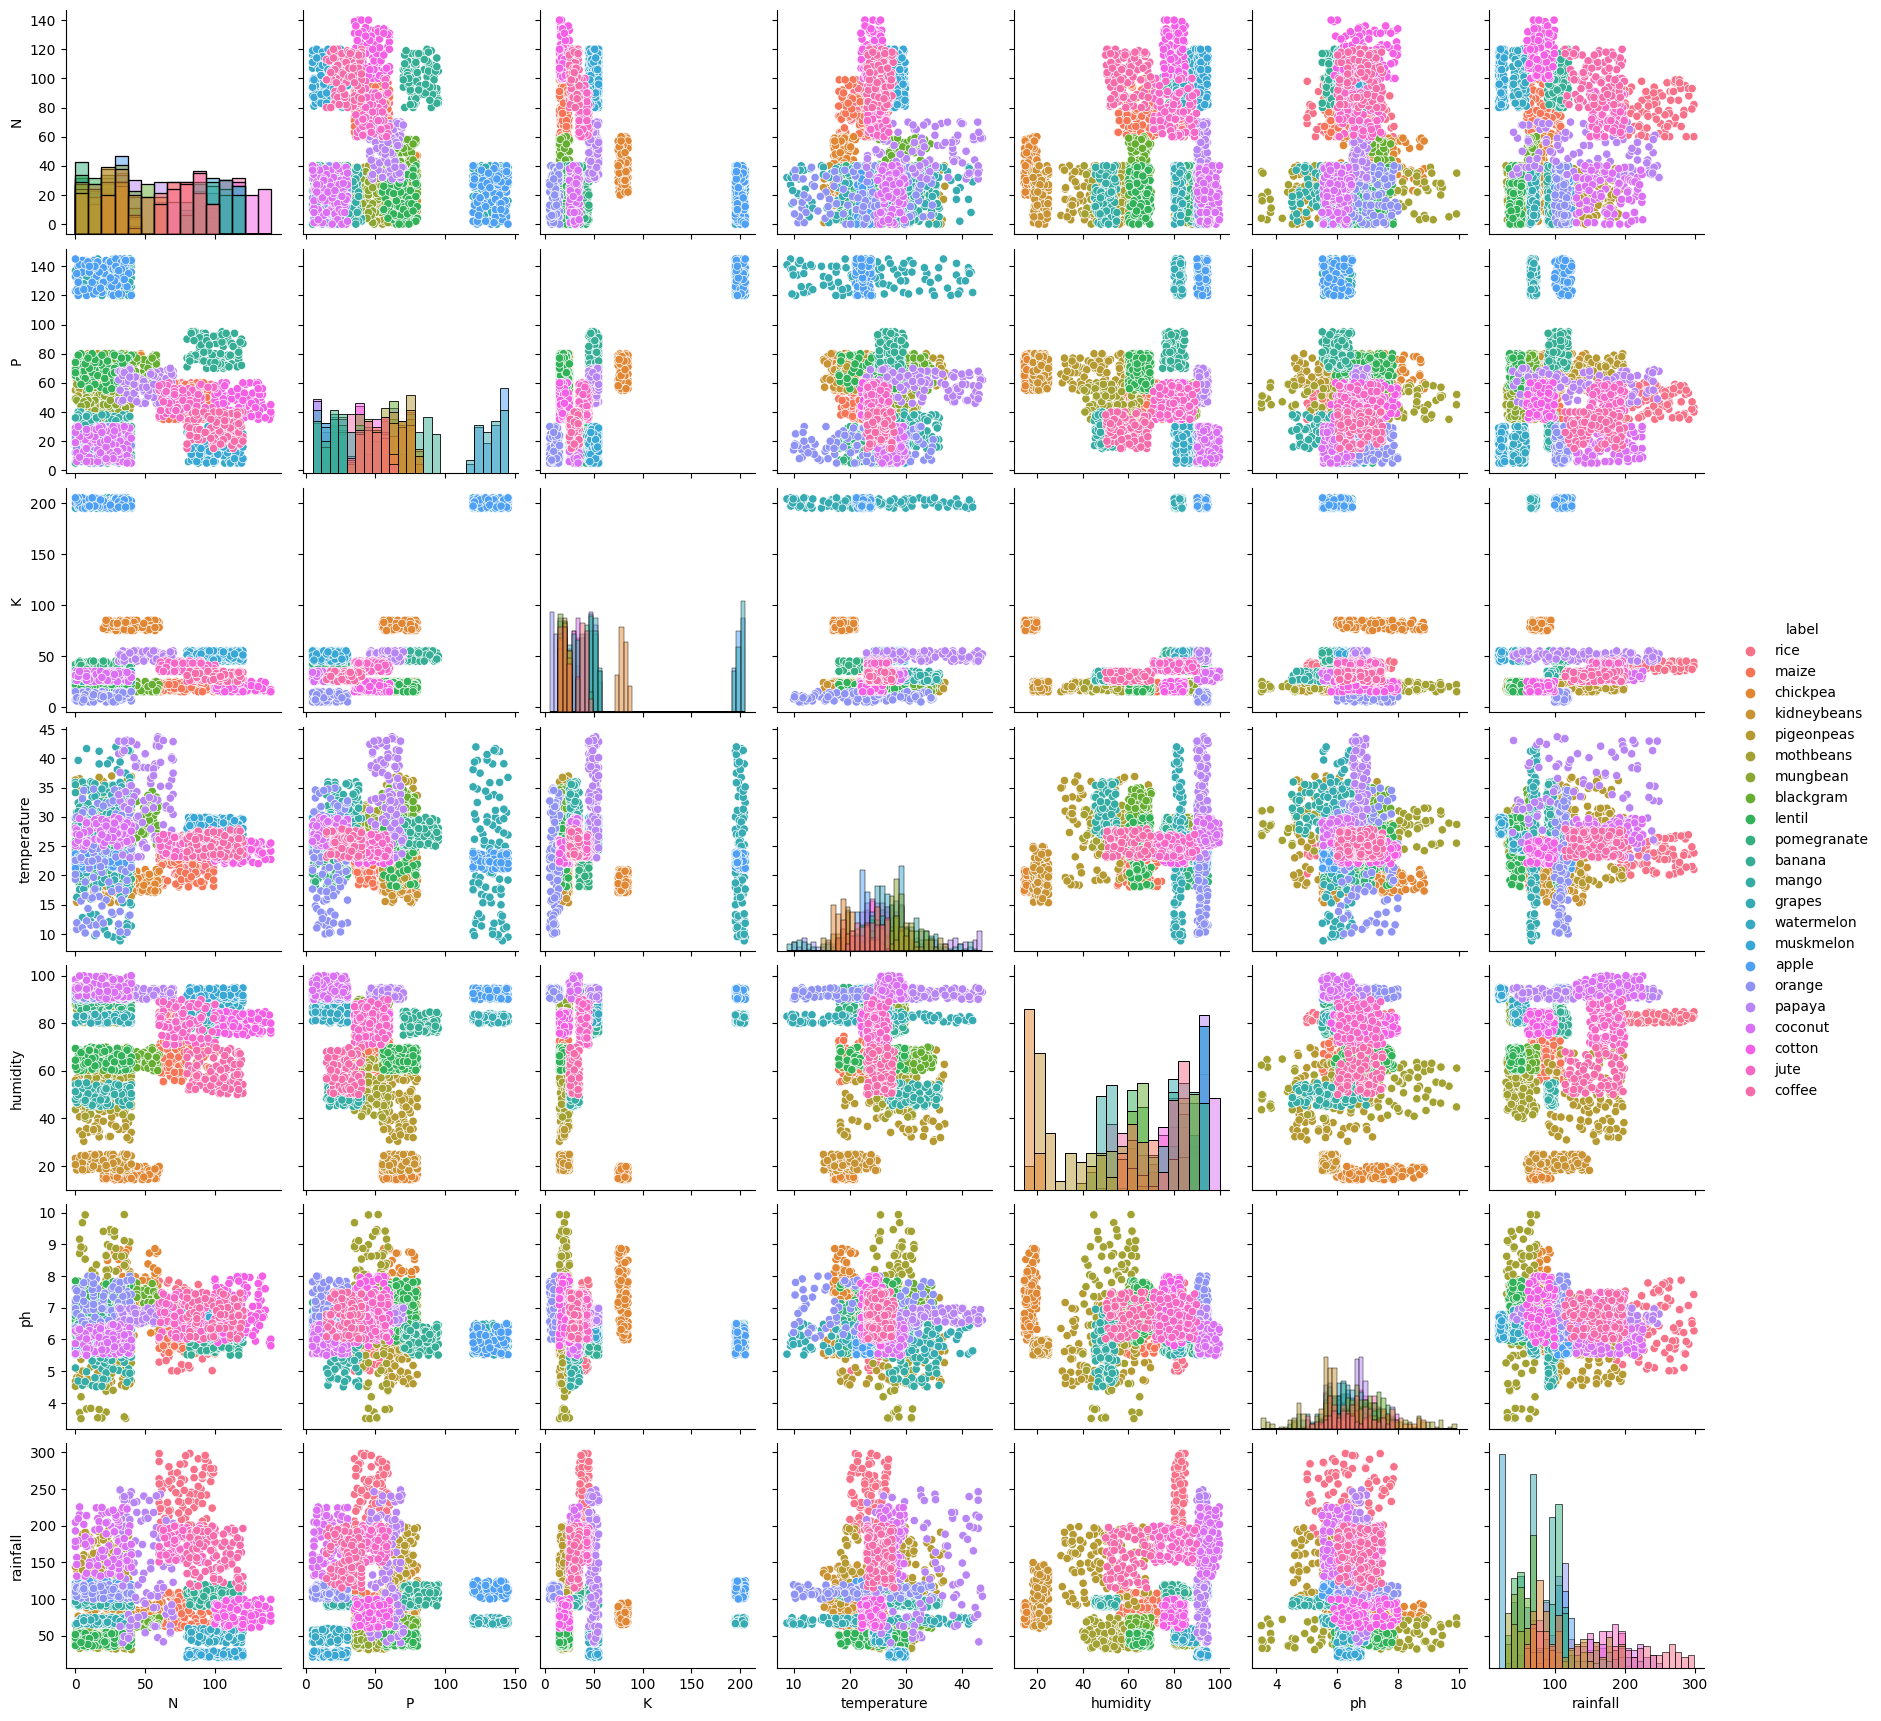

In [ ]:
sns.pairplot(df, hue="label", diag_kind="hist")

In [ ]:
def scatter_func(var):
  df_=df
  df_=df_.drop([var, 'label'], axis=1)
  sns.pairplot(df,
              x_vars=df_.columns,
              y_vars=var, hue='label', height=5)
  plt.suptitle(f'Visualizing {var} with other variables', size=20, y=1.05)

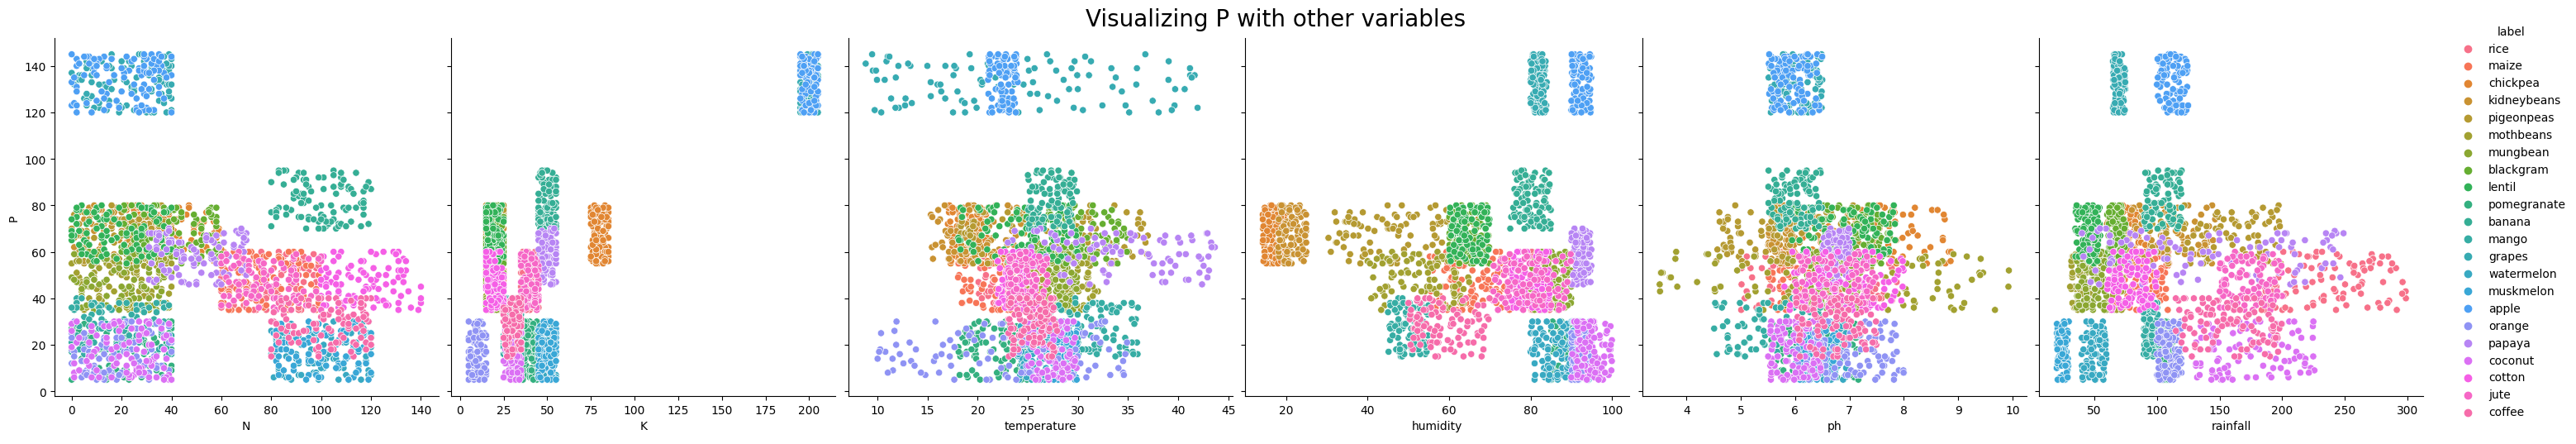

In [ ]:
scatter_func("P")

In [ ]:
sns.relplot(x='rainfall',y='temperature',data=df,kind='scatter',hue='label',height=5)
plt.show()

In [ ]:
grouped = df.groupby(by='label').mean().reset_index()

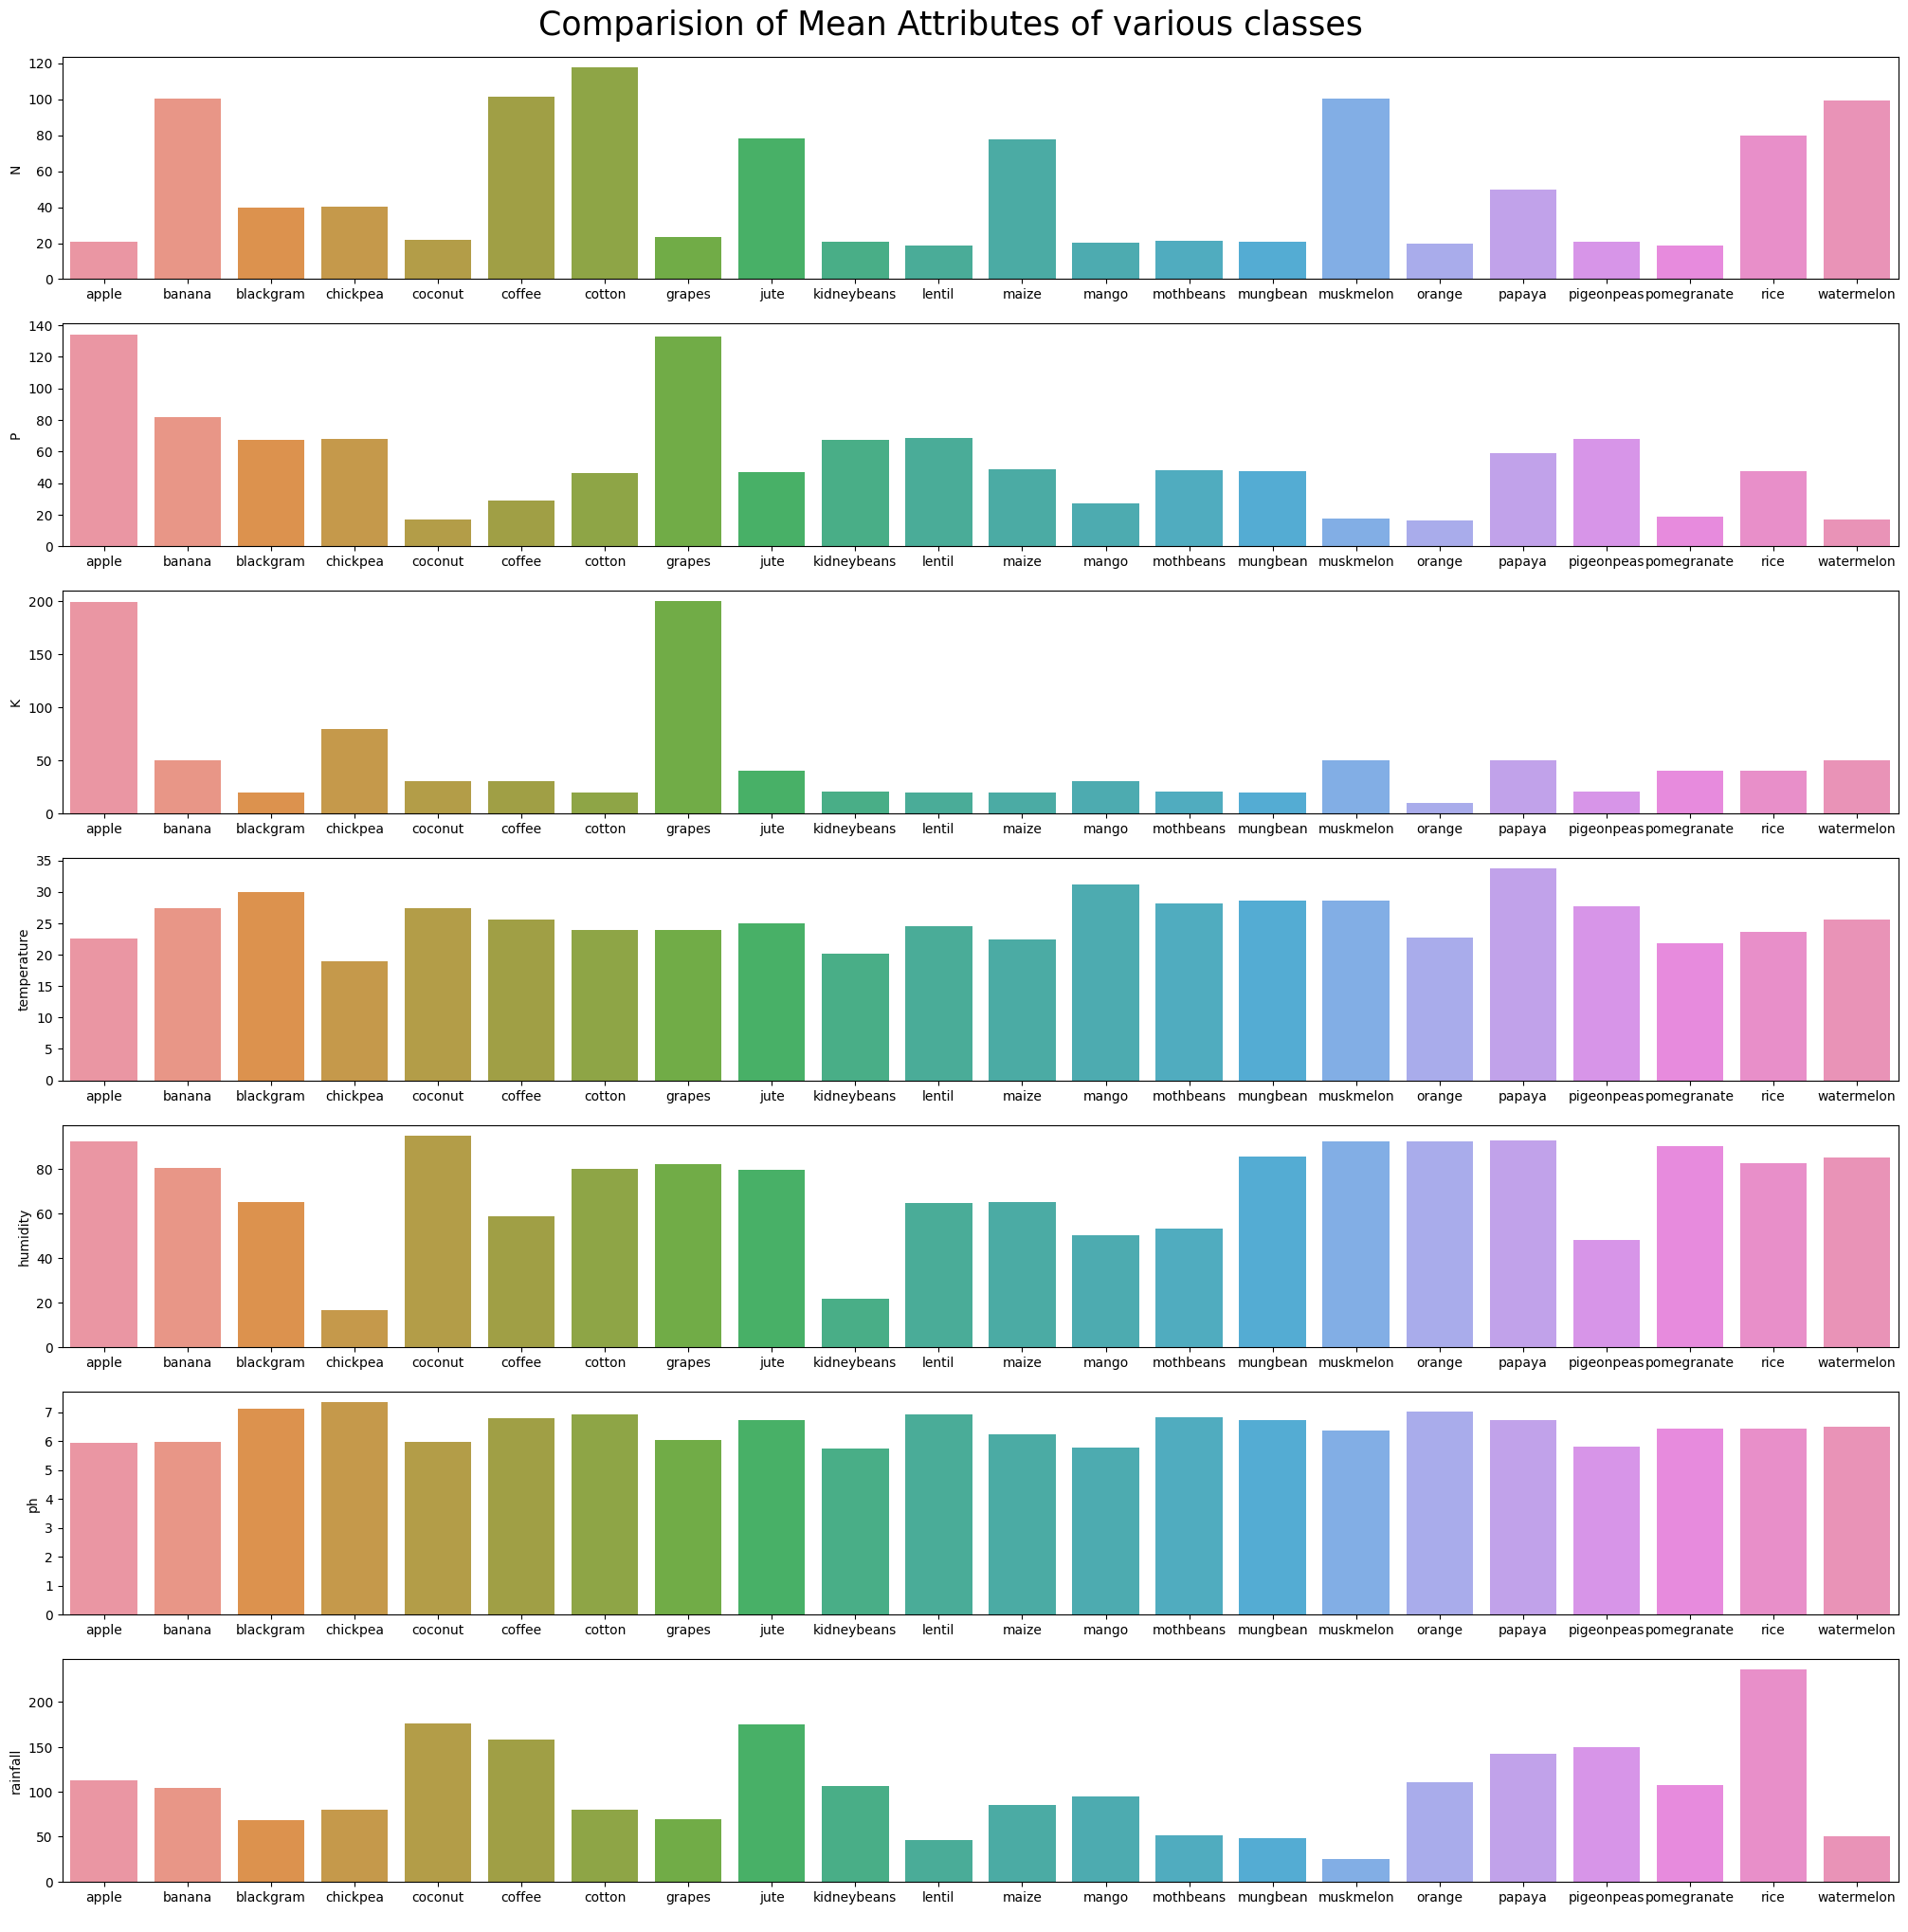

In [226]:
##3
fig,ax=plt.subplots(7,1,figsize=(25,25))
fig.suptitle("Comparision of Mean Attributes of various classes",size=25, y= 0.9)
for index,i in enumerate(grouped.columns[1:]):
    sns.barplot(data=grouped,x='label',y=i,ax=ax[index]).set(xlabel=' ')


In [ ]:
def boxplot_func(var):
  sns.catplot(data=df, x='label', y=var, kind='box', height=10, aspect=20/8.27)
  plt.xticks(rotation='vertical')
  plt.title(var, size=20)
  plt.show()

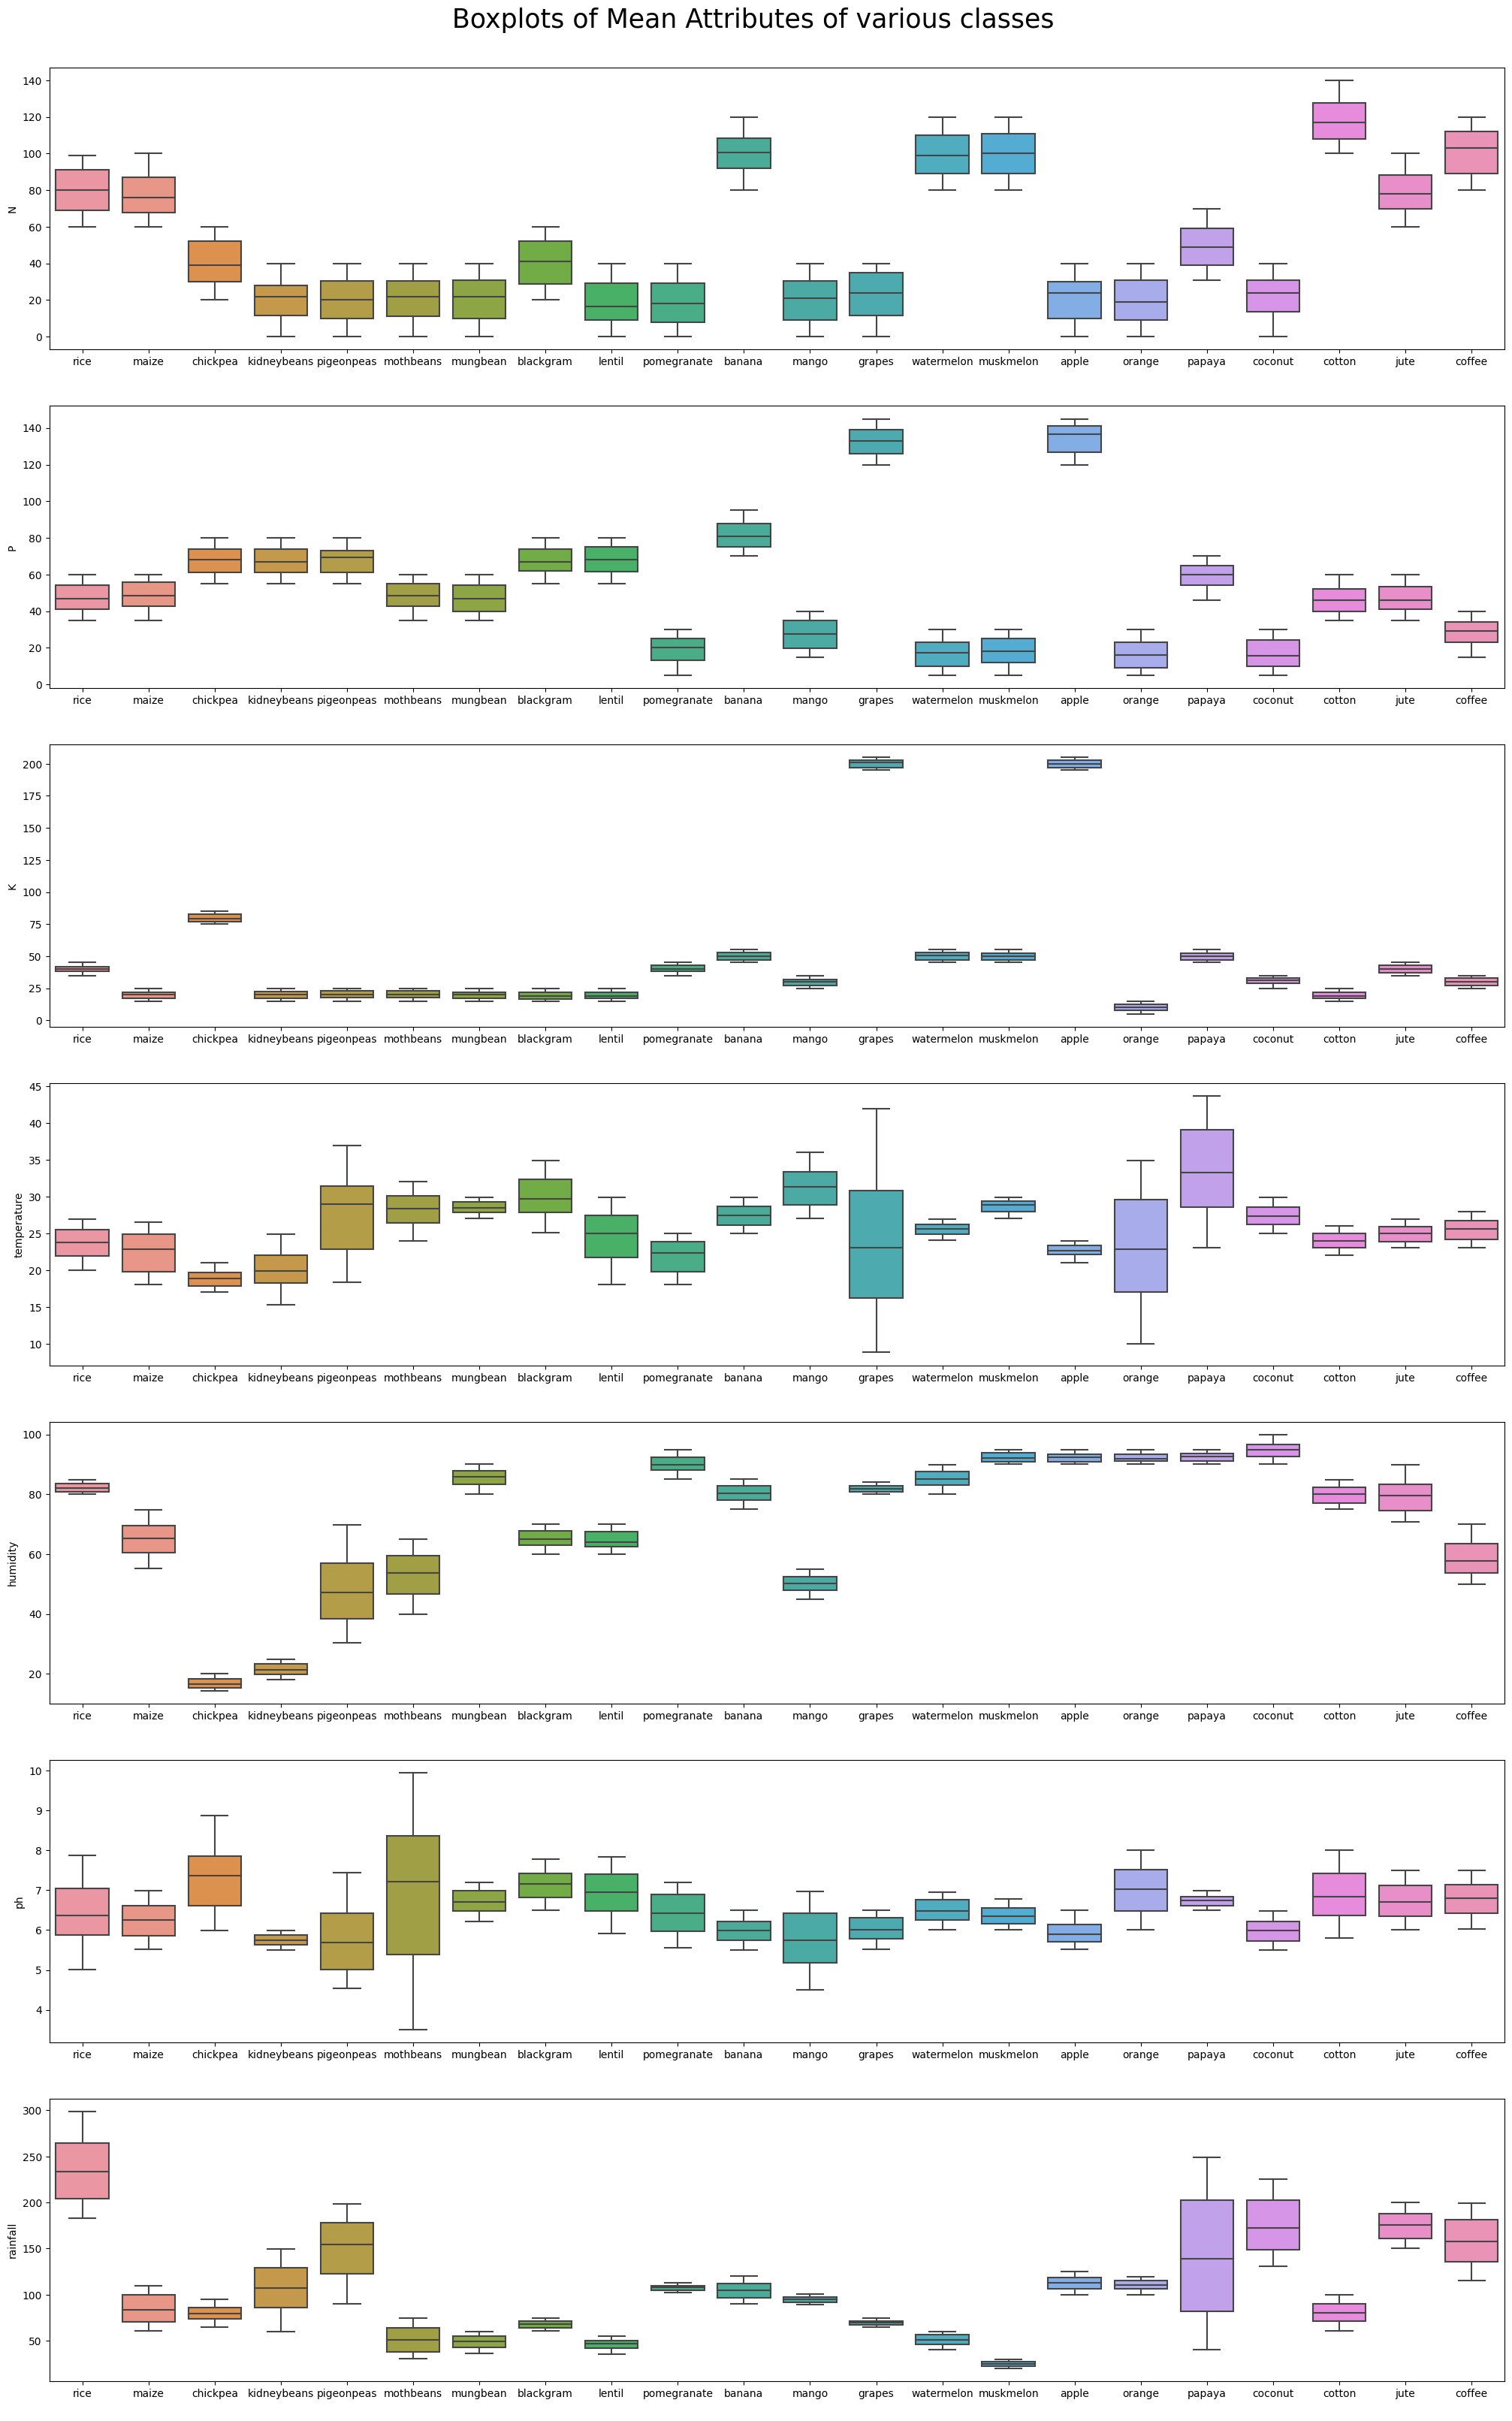

In [230]:
fig,ax=plt.subplots(7,1,figsize=(25,40))
fig.suptitle("Boxplots of Mean Attributes of various classes",size=25, y=0.9)
for index,i in enumerate(grouped.columns[1:]):
    sns.boxplot(data=df,x='label',y=i,ax=ax[index]).set(xlabel=' ')

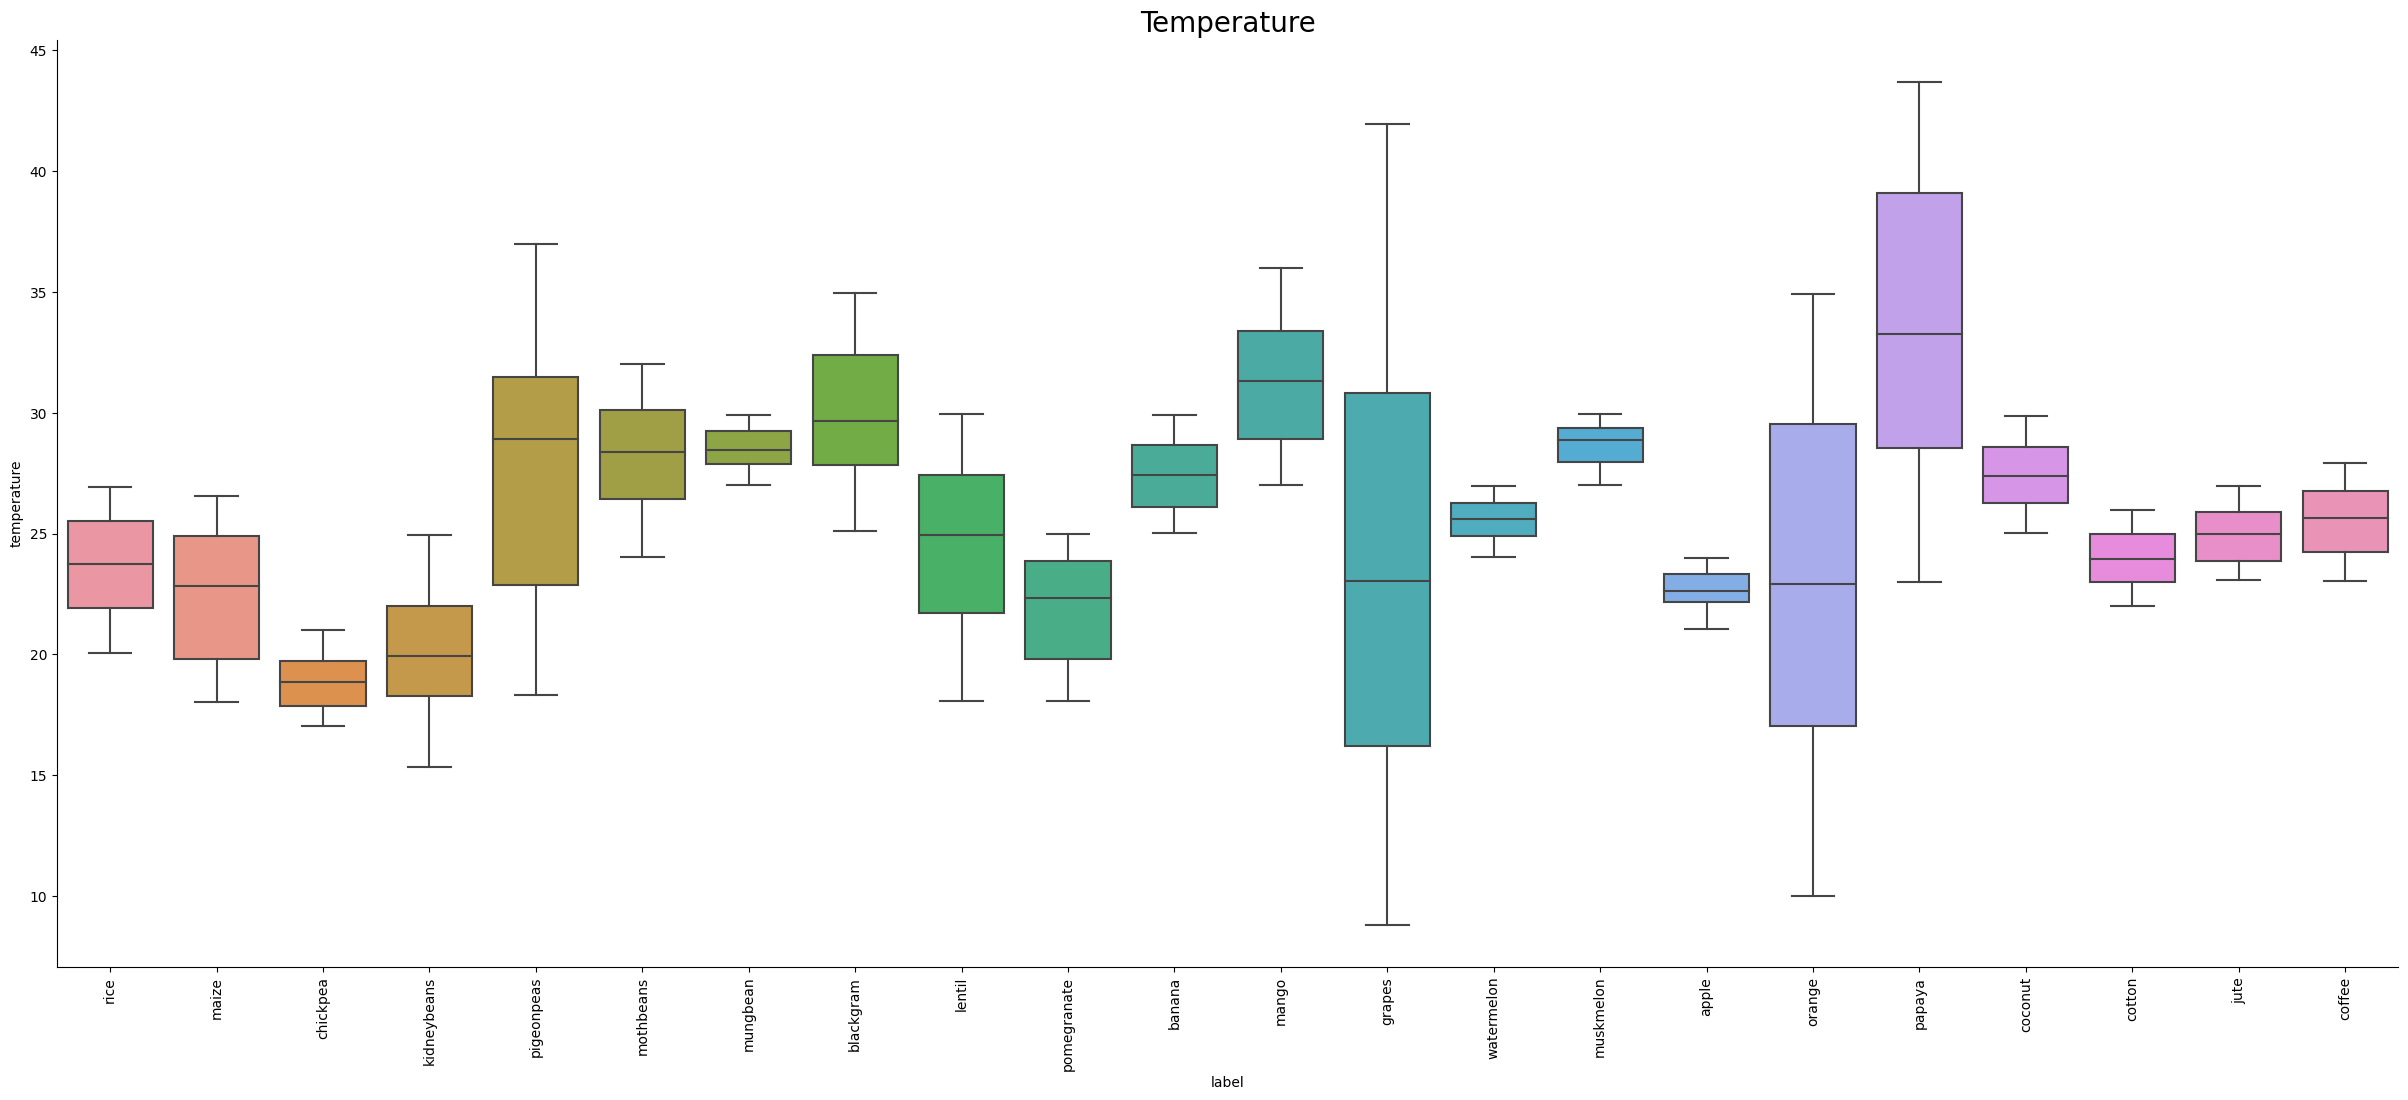

In [ ]:
##4
sns.catplot(data=df, x='label', y='temperature', kind='box', height=10, aspect=20/8.27)
plt.xticks(rotation='vertical')
plt.title("Temperature", size=20)
plt.show()

In [275]:
def crop_condition(crop, condition):
    x = df[df['label'] == crop]
    print("-------------------------------------------------")
    print("Statistics for :" + condition)
    print("Minimum Nitrogen Required :", x[condition].min())
    print("Average Nitrogen Required :", x[condition].mean())
    print("Maximum Nitrogen Required :", x[condition].max())
    print("-------------------------------------------------")

In [277]:
crop_condition('orange', 'N')

-------------------------------------------------
Statistics for :N
Minimum Nitrogen Required : 0
Average Nitrogen Required : 19.58
Maximum Nitrogen Required : 40
-------------------------------------------------


In [271]:
def crop_summary(crop):
   con = df.columns.values.tolist()
   con.remove('label')
   for c in con:
    x = df[df['label'] == crop]
    print("Statistics for : " + c)
    print("Minimum Nitrogen Required :", x[c].min())
    print("Average Nitrogen Required :", x[c].mean())
    print("Maximum Nitrogen Required :", x[c].max())
    print("-------------------------------------------------")

In [273]:
crop_summary('orange')

Statistics for : N
Minimum Nitrogen Required : 0
Average Nitrogen Required : 19.58
Maximum Nitrogen Required : 40
-------------------------------------------------
Statistics for : P
Minimum Nitrogen Required : 5
Average Nitrogen Required : 16.55
Maximum Nitrogen Required : 30
-------------------------------------------------
Statistics for : K
Minimum Nitrogen Required : 5
Average Nitrogen Required : 10.01
Maximum Nitrogen Required : 15
-------------------------------------------------
Statistics for : temperature
Minimum Nitrogen Required : 10.01081312
Average Nitrogen Required : 22.7657254967
Maximum Nitrogen Required : 34.90665289
-------------------------------------------------
Statistics for : humidity
Minimum Nitrogen Required : 90.00621688
Average Nitrogen Required : 92.17020876340001
Maximum Nitrogen Required : 94.96419851
-------------------------------------------------
Statistics for : ph
Minimum Nitrogen Required : 6.010391864
Average Nitrogen Required : 7.01695745276
Max

In [257]:
def compare(crop):
  print("Average Value for",crop,"is {0: .2f}".format(df[crop].mean()))
  print("----------------------------------------------------------------")
  for c in df['label'].unique():
    df_= df[df['label'] == c]
    print(c,": {0: .2f}".format(df_[crop].mean()))

In [258]:
compare('N')

Average Value for N is  50.55
----------------------------------------------------------------
rice :  79.89
maize :  77.76
chickpea :  40.09
kidneybeans :  20.75
pigeonpeas :  20.73
mothbeans :  21.44
mungbean :  20.99
blackgram :  40.02
lentil :  18.77
pomegranate :  18.87
banana :  100.23
mango :  20.07
grapes :  23.18
watermelon :  99.42
muskmelon :  100.32
apple :  20.80
orange :  19.58
papaya :  49.88
coconut :  21.98
cotton :  117.77
jute :  78.40
coffee :  101.20
